## Homework 2
### Due: Thursday Feb. 13

**Integer vs floating point number**

Write a program to calculate and print the factorial of a
number.  If you wish you can base your program on the
user-defined function for factorial given in Section 2.6, but write your
program so that it calculates the factorial using *integer*
variables, not floating-point ones.  Use your program to calculate the
factorial of 200.

Now modify your program to use floating-point variables instead and again
calculate the factorial of 200.  What do you find?  Explain.

(20 points)

In [70]:
# code
import numpy as np
import matplotlib.pyplot as plt

def factorial(x):
    result = 1
    while x > 1:
        result = result * x 
        x = x - 1
    return result

print(factorial(200))
print(factorial(200.0))

788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000
inf


My function could take integers and floats as inputs. With the factorial of integer 200, I got a very large number, but python was able to compute and show it. With the factorial of the float of 200, python displayed it as infinite. This is probably because you are delaing with storing memory on both extremes of a number. The number itself is very large, but if you include the float, it also has a trail of decimals that are getting multiplied. So, in the end, Python cannot store a number with that mcuh data in memory.

**A Simple Derivative**

Suppose we have a function $f(x)$ and we want to
calculate its derivative at a point $x$.  We can do that with pencil and
paper if we know the mathematical form of the function, or we can do it on
the computer by making use of the definition of the derivative:

<p style="text-align:center;">
${d f\over d x} = \lim_{\delta\to0} {f(x+\delta)-f(x)\over\delta}.$
</p>

On the computer we can't actually take the limit as $\delta$ goes to
zero, but we can get a reasonable approximation just by making $\delta$
small.
- Write a program that defines a function *f(x)* returning the
  value $x(x-1)$, then calculates the derivative of the function at the
  point $x=1$ using the formula above with $\delta=10^{-2}$.  Calculate
  the true value of the same derivative analytically and compare with the
  answer your program gives.  The two will not agree perfectly.  Why not?
- Repeat the calculation for $\delta=10^{-4}$, $10^{-6}$, $10^{-8}$,
  $10^{-10}$, $10^{-12}$, and $10^{-14}$.  You should see that the accuracy
  of the calculation initially gets better as $\delta$ gets smaller, but
  then gets worse again.  Why is this?

(20 points)

In [71]:
# code
def function1(x):
    return x * (x-1)
def derivative(x,function,stepsize):
    result = (function(x + stepsize) - function(x - stepsize))/stepsize
    return result

print("For h=1e-2 " + str(derivative(1,function1,1e-2)))
print("For h=1e-4 " + str(derivative(1,function1,1e-4)))
print("For h=1e-6 " + str(derivative(1,function1,1e-6)))
print("For h=1e-8 " + str(derivative(1,function1,1e-8)))
print("For h=1e-10 " + str(derivative(1,function1,1e-10)))
print("For h=1e-12 " + str(derivative(1,function1,1e-12)))
print("For h=1e-14 " + str(derivative(1,function1,1e-14)))


For h=1e-2 2.0000000000000018
For h=1e-4 1.9999999999997797
For h=1e-6 1.999999999946489
For h=1e-8 1.9999999989472879
For h=1e-10 2.000000165480742
For h=1e-12 2.0000667788622195
For h=1e-14 1.9984014443252818


I believe that the source of this error propogation is due to floating point error. As h gets smaller and smaller, the error in the float from python becomes a larger fraction of h. If you have floating decimals at around 1e-10, that won't affect stepsize around 1e-6 too much. But if your stepsize is in the same range as the floating point error, then that will increase error.

### Simpson's Rule

- Write a program to calculate an approximate value for the integral $\int_{0}^{2} ( x^4 - 2x + 1)dx$ from Example 5.1 in the book, but using Simpson's rule with 10 slices instead of the trapezoid rule. You may be able to modify your code from the trapezoid rule to complete this task. Compare your result to the known correct value of 4.4. What is the fractional error on your calculation?

- Copy your code and modify it to use one hundred slices, then one thousand. Note the improvement in the result and compare to the results from the trapezoid rule.

(30 points)

In [72]:
# code
def simpsons(x0,xf,function,steps):
    h = (xf-x0)/ steps # defining h
    evenSum = 0                #initializing each sum
    oddSum = 0

    for i in range(1,steps,2):
        oddSum = oddSum + function(x0 + i*h)

    for i in range(2,steps,2):
        evenSum = evenSum + function(x0 + i*h)
    
    integral = (1/3)*h*(function(x0) + function(xf) + 4*oddSum + 2*evenSum)
    return integral

def function2(x):
    return x**4 - 2*x + 1

print("Simpsons for N= 10: " + str(simpsons(0,2,function2,10)))
print("Simpsons for N= 100: " + str(simpsons(0,2,function2,100)))
print("Simpsons for N= 10000: " + str(simpsons(0,2,function2,10000)))

Simpsons for N= 10: 4.400426666666667
Simpsons for N= 100: 4.400000042666667
Simpsons for N= 10000: 4.400000000000002


### An Integral With No Analytic Solution

Consider the integral

$$ E(x) = \int_{0}^{x} \exp{-t^2} dt$$

- Write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

- When you are convinced your program is working, extend it further to make a graph of E(x) as a function of x.

(30 points)

In [73]:
def bellCurve(x):
    return np.exp(-x**2)

# For the first part we will use our simpsons's function and set 30 steps to make sure we have a stepsize of 0.1
simpsons(0,3,bellCurve,30) 

# For the graphing we will do the following:
#   1) Increase the number of steps to 1000. Might as well
#   2) create a list of xf values 

xVals = np.arange(0.1,20,.1)
yVals = []
for i in xVals:
    yVals.append(simpsons(0,i,bellCurve,100))
print(len(xVals))
print(len(yVals))

199
199


Text(0.5, 1.0, 'Integral of e^(-t^2) from 0 to various upper bounds')

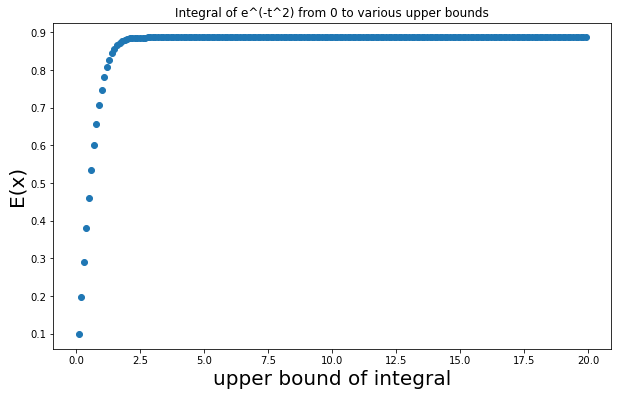

In [74]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.scatter(xVals,yVals) # Note: I shifted which parts I was graphing because there would be a vertical line if I included the starting value. I couldn't source that error
ax.set_ylabel("E(x)", size = 20)
ax.set_xlabel("upper bound of integral", size = 20)
ax.set_title("Integral of e^(-t^2) from 0 to various upper bounds")

Note: I'm not sure what you wanted to show with this. If I'm reading the instructions accurately, you asked us to find the area under the right half of bell curve from different bounds of x. Then plot how that area changes as you increase the bounds. But the area under a bell curve doesn't really change significantly as you increase the upper bound past 3. It stays at about 0.886227 (I used Wolfram Alpha for that).